# Memory Scores

In [ ]:
# Do children with neurodevelopmental disorders have lower memory scores?
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

## Check for Normality

In [6]:
data = pd.read_csv('memory_scores.csv')
normality_tests = {}
for col in data.columns:
    stat, p = shapiro(data[col])
    normality_tests[col] = {'Shapiro-Wilk Statistic': stat, 'p-value': p, 'Normality': p > 0.05}

print("Normality Tests:")
print(pd.DataFrame(normality_tests))

Normality Tests:
                          Normal  Autistic  Epilepsy
Shapiro-Wilk Statistic  0.954278  0.856206  0.947875
p-value                 0.495997  0.010625  0.392663
Normality                   True     False      True


## Check homogeneity of variances (different participants in different groups, Factorial ANOVA)

In [7]:
homogeneity_test = levene(data['Normal'], data['Autistic'], data['Epilepsy'])
homogeneity_result = "Variances are Homogeneous" if homogeneity_test.pvalue > 0.05 else "Variances are not Homogeneous"
print("\nHomogeneity of Variances Test:")
print(f"Levene's Test Statistic: {homogeneity_test.statistic}")
print(f"p-value: {homogeneity_test.pvalue}")
print(homogeneity_result)


Homogeneity of Variances Test:
Levene's Test Statistic: 6.628001093792725
p-value: 0.0027621044671046974
Variances are not Homogeneous


## Check for sphericity of variances (same participants across groups, repeated measures ANOVA)

In [9]:
import pingouin as pg
mauchly_result = pg.sphericity(data[['Normal', 'Autistic', 'Epilepsy']])
print("\nMauchly's Test for Sphericity:")
print(mauchly_result)


Mauchly's Test for Sphericity:
SpherResults(spher=True, W=0.8371875064512045, chi2=2.8433153845984496, dof=2, pval=0.2413136613574385)


## Check

In [10]:
anova_result = f_oneway(data['Normal'], data['Autistic'], data['Epilepsy'])
print("\nOne-way ANOVA Test:")
print(f"F-statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")

# Choose appropriate test
if anova_result.pvalue < 0.05:
    print("\nSince p-value < 0.05, there are significant differences between groups.")
    # You may proceed with post-hoc tests if necessary
else:
    print("\nNo significant differences between groups.")


One-way ANOVA Test:
F-statistic: 23.867308893389097
p-value: 4.831350364781915e-08

Since p-value < 0.05, there are significant differences between groups.


In [12]:
if anova_result.pvalue < 0.05:
    posthoc = pairwise_tukeyhsd(data.melt()['value'], data.melt()['variable'], alpha=0.05)
    print("\nPost-hoc Test:")
    print(posthoc)


Post-hoc Test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
Autistic Epilepsy  14.3889    0.0  8.2842 20.4935   True
Autistic   Normal  15.7778    0.0  9.6731 21.8824   True
Epilepsy   Normal   1.3889 0.8473 -4.7158  7.4935  False
--------------------------------------------------------


In [13]:
effect_size = anova_result.statistic / (anova_result.statistic + (len(data) - 1))
print("\nEffect Size (Eta-squared):", effect_size)


Effect Size (Eta-squared): 0.584019587774961


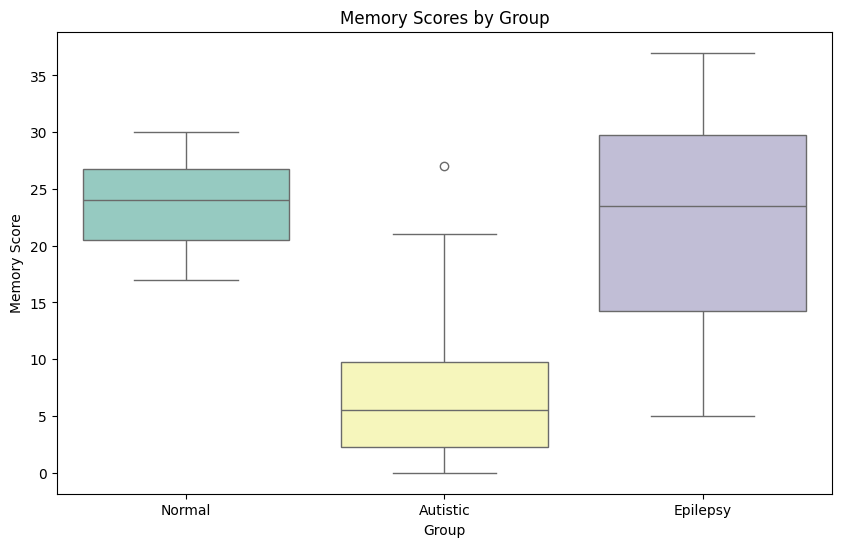

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', hue='variable', data=data.melt(), palette="Set3", legend=False)
plt.title('Memory Scores by Group')
plt.xlabel('Group')
plt.ylabel('Memory Score')
plt.show()